# Classification with Decision Trees

In this example, we'll see how we can perform a classification using **Decision Trees** and [scikit-learn](https://scikit-learn.org).

## Clustering with Decision Trees

In this example, we generate a few clusters with labels and use decision trees to classify them.

Let us start with importing some usual libraries.

In [1]:
# For various numerical operations
import numpy as np
# For plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

Let us create 4 clusters with `make_blobs` and spread 300 points accross them.

We plot the points with a color representing the cluster they belong to.

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

We can now import the `DecisionTreeClassifier` (more info [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and instanciate a decision tree (with default parameters) and perform a fit of the model to our data. (This is a common paradigm.)

In [3]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

We'll use a helper function to visualise our model

In [4]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    # Setting up axes
    ax = ax or plt.gca()

    # Plot the training points X and coloured by y (c=y)
    # X[:,0] is the x1 coordinate and X[:,1] is the x2 coordinate
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # fit the estimator
    model.fit(X, y)

    # Create a 2D grid 200x200 of your data space (x1, x2)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))

    # Z is model prediction for grid (xx and yy)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

And let's apply it to our model and training data.

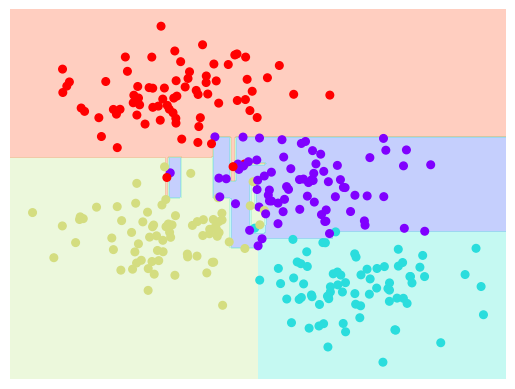

In [5]:
visualize_classifier(DecisionTreeClassifier(random_state=0), X, y)

As you can see, the model performs well but suffers from some very narrow regions, due to outliers.

You can try to adjust the parameters of the `DecisionTreeClassifier` to improve things.

Eventually, you'll see that over-fitting turns out to be a general property of decision trees: it is very easy to go too deep in the tree, and thus to fit details of the particular data rather than the overall properties of the distributions they are drawn from.

Another way to see this over-fitting is to look at models trained on different subsets of the data—for example, in this figure we train two different trees, each on half of the original data:



In [6]:
model = DecisionTreeClassifier()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
visualize_classifier(model, X[::2], y[::2],ax=ax[0])
visualize_classifier(model, X[1::2], y[1::2],ax=ax[1])

## Using Random Forests

An ensemble of randomised decision trees is known as a random forest. Random forests are an example of an *ensemble* method, meaning that it relies on aggregating the results of an ensemble of simpler estimators.

Below, we have randomise the data by fitting each estimator with a random subset of 80% of the training points.

In practice, decision trees are more effectively randomized by injecting some stochasticity in how the splits are chosen: this way all the data contributes to the fit each time, but the results of the fit still have the desired randomness. For example, when determining which feature to split on, the randomized tree might select from among the top several features.



In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

# bag2 = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
#                         random_state=1)

# bag2.fit(X, y)
# visualize_classifier(bag2, X, y)

In [scikit-earn](https://scikit-learn.org), such an optimized ensemble of randomized decision trees is implemented in the `RandomForestClassifier` estimator, which takes care of all the randomization automatically.

All you need to do is select a number of estimators, and it will very quickly (in parallel, if desired) fit the ensemble of trees:




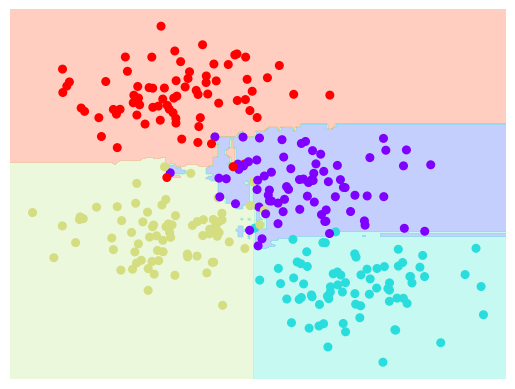

In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

We see that by averaging over 100 randomly perturbed models, we end up with an overall model that is much closer to our intuition about how the parameter space should be split.

## Digit Classification

Decision trees can be also used to classify (normalised) images, such as hand-written digits.

[scikit-learn](https://scikit-learn.org)'s `load_digits` [provides 8x8 images of digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html).

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()
print(digits.data[1])
print(digits.images[1])
print(len(digits.data))


[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]
1797


Let us use `Matplotlib` to plot some of these images together with their target digit.


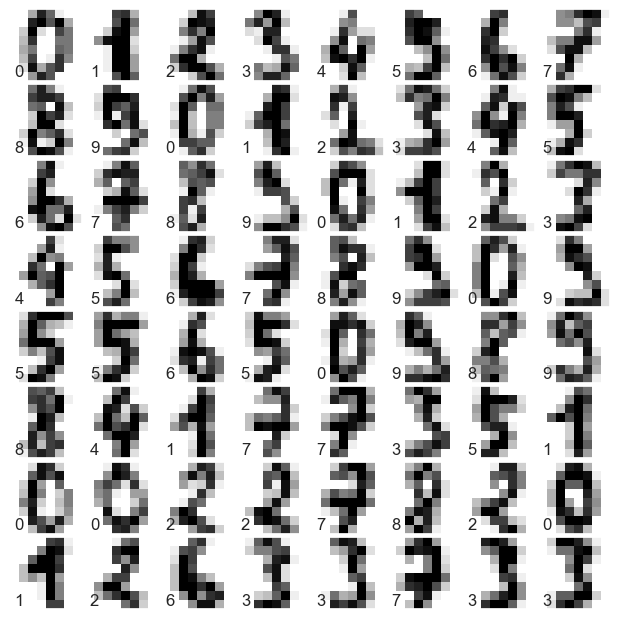

In [10]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

Before we can train our model, we need to split our dataset into a training and a testing dataset. We do this using the `train_test_split` function.

In [11]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)

# defining our model
model = RandomForestClassifier(n_estimators=1000)
# fitting our model
model.fit(Xtrain, ytrain)
# checking the model's prediction
ypred = model.predict(Xtest)

Let us look at some metrics, such as the [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html). For this we compare the predicted output with that (true) of our testing sample.

In [12]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))


              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.98      0.98        43
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



And the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

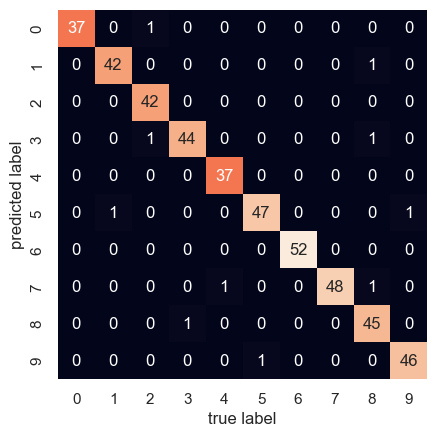

In [13]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Regression using Decision Trees


Random forests can also be made to work in the case of regression (of a continuous variable). The estimator to use for this is the `RandomForestRegressor` (more info [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html), and the syntax is very similar to what we saw earlier.

Let's create a dataset drawn from the combination of a fast and slow oscillation, adding some noise:



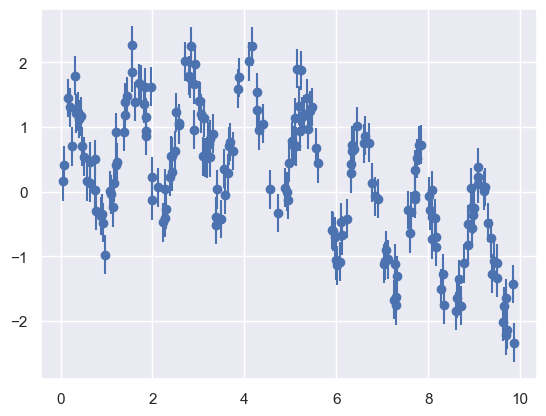

In [14]:
import numpy as np
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

Using the `RandomForestRegressor` to find the best fit curve as follows:



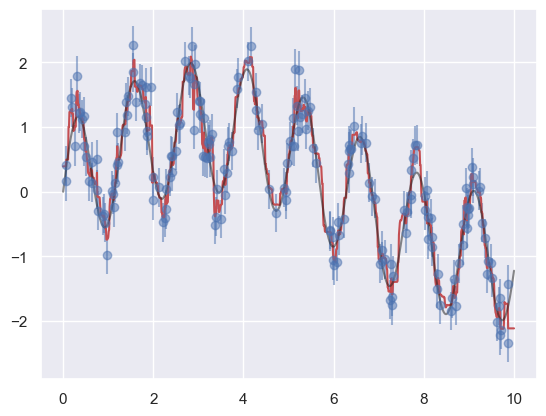

In [15]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

The true model is shown in the smooth black curve, while the random forest model is shown by the jagged red curve.

As you can see, the non-parametric random forest model is flexible enough to fit the multi-period data, without us needing to specifying a multi-period model!

